In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
plt.rcParams['axes.facecolor'] = '#e8e8e8'
plt.rcParams['axes.edgecolor'] = '#111617'
plt.rcParams['axes.labelcolor'] = '#111617'
plt.rcParams['xtick.color'] = '#111617'
plt.rcParams['ytick.color'] = '#111617'
plt.rcParams['text.color'] = '#111617'
plt.rcParams['grid.color'] = '#e8e8e8'
plt.rcParams["figure.facecolor"] = "#e8e8e8"

# Define Color Palette for Bar Plot
colors = [
    "#FFFFFF",
    "#ffffbb",
    "#a3e9da",
    "#5a99c7"
]


### Example of Data for Marketing Channels


In [283]:
#! Faked data
control = np.random.choice([0, 1], size=50, p=[0.7, 0.3])
email_treatment = np.random.choice([0, 1], size=30, p=[0.5, 0.5])
poster_treatment = np.random.choice([0, 1], size=50, p=[0.3, 0.7])
booth_treatment = np.random.choice([0, 1], size=20, p=[0.1, 0.9])

In [284]:
## Fake Data For Different Segments (When Treatments by Segment might differ)

### Email Treatment Drops Off After Year 1
email_treatment_year1 = np.random.choice([0, 1], size=30, p=[0.3, 0.7])
email_treatment_year2 = np.random.choice([0, 1], size=30, p=[0.5, 0.5])
email_treatment_year3 = np.random.choice([0, 1], size=30, p=[0.7, 0.3])
email_treatment_year4 = np.random.choice([0, 1], size=30, p=[0.8, 0.2])

### Poster Treatment Drops Off After Year 2
poster_treatment_year1 = np.random.choice([0, 1], size=50, p=[0.3, 0.7])
poster_treatment_year2 = np.random.choice([0, 1], size=50, p=[0.5, 0.5])
poster_treatment_year3 = np.random.choice([0, 1], size=50, p=[0.7, 0.3])
poster_treatment_year4 = np.random.choice([0, 1], size=50, p=[0.8, 0.2])

### Booth Treatment Never Drops Off
booth_treatment_year1 = np.random.choice([0, 1], size=20, p=[0.1, 0.9])
booth_treatment_year2 = np.random.choice([0, 1], size=20, p=[0.1, 0.9])
booth_treatment_year3 = np.random.choice([0, 1], size=20, p=[0.1, 0.9])
booth_treatment_year4 = np.random.choice([0, 1], size=20, p=[0.1, 0.9])



### Example of Ways to Illustrate Results

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
from statsmodels.stats.proportion import proportions_ztest

# Control vs Email
count_1 = np.array([email_treatment.sum(), control.sum()])
n_obs_1 = np.array([email_treatment.shape[0], control.shape[0]])
stat_1, pval_1 = proportions_ztest(count_1, n_obs_1)
print(f"Control vs Email: {stat_1}, {pval_1}")

# Control vs Poster
count_2 = np.array([poster_treatment.sum(), control.sum()])
n_obs_2 = np.array([poster_treatment.shape[0], control.shape[0]])
stat_2, pval_2 = proportions_ztest(count_2, n_obs_2)
print(f"Control vs Poster: {stat_2}, {pval_2}")

# Control vs Booth
count_3 = np.array([booth_treatment.sum(), control.sum()])
n_obs_3 = np.array([booth_treatment.shape[0], control.shape[0]])
stat_3, pval_3 = proportions_ztest(count_3, n_obs_3)
print(f"Control vs Booth: {stat_3}, {pval_3}")

Control vs Email: 3.300835523244858, 0.0009639737570067776
Control vs Poster: 6.004805767690768, 1.915610862425672e-09
Control vs Booth: 5.590689935373662, 2.2616913558021076e-08


### Converting These Into Visual Insights

C:\Users\commo\AppData\Local\Temp\ipykernel_15312\3250873151.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=["Control", "Email", "Poster", "Booth"],


Text(0.5, 1.0, '1st Year')

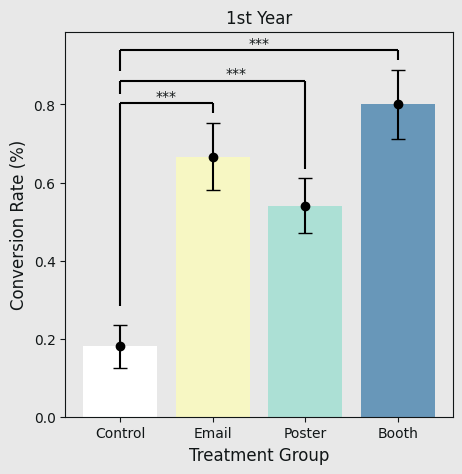

In [302]:
def proportion_sample_error(p, n):
    return np.sqrt(p * (1 - p) / n)

def significance(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    
# PLOT FOR 1st YEAR

email_treatment = email_treatment_year1
poster_treatment = poster_treatment_year1
booth_treatment = booth_treatment_year1

plt.figure(figsize=(5, 5))

sns.barplot(x=["Control", "Email", "Poster", "Booth"],
            y=[control.mean(), email_treatment.mean(), poster_treatment.mean(), booth_treatment.mean()],
            palette=colors, ci=None)

# Error Bars

plt.errorbar(0, control.mean(), yerr=proportion_sample_error(control.mean(), control.shape[0]),
                 fmt='o', color='black', capsize=5)
plt.errorbar(1, email_treatment.mean(), yerr=proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(2, poster_treatment.mean(), yerr=proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(3, booth_treatment.mean(), yerr=proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)  

# Significance Resutls

control_height = control.mean() + proportion_sample_error(control.mean(), control.shape[0])

## Control vs Email
email_height = email_treatment.mean() + proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]) + .05
plt.hlines(email_height, 0, 1, color='black', linestyle='-')
control_star = significance(pval_1)
plt.text(0.5, email_height, control_star, ha='center', va='bottom')

## Control vs Poster
poster_height = poster_treatment.mean() + proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]) + .05 + .2
plt.hlines(poster_height, 0, 2, color='black', linestyle='-')
poster_star = significance(pval_2)
plt.text(1.25, poster_height, poster_star, ha='center', va='bottom')

## Control vs Booth
booth_height = booth_treatment.mean() + proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]) + .05
plt.hlines(booth_height, 0, 3, color='black', linestyle='-')
booth_star = significance(pval_3)
plt.text(1.5, booth_height, booth_star, ha='center', va='bottom')

## VLINEs 
plt.vlines(0, control_height + .05, email_height, color='black', linestyle='-')
plt.vlines(0, email_height + .025, poster_height, color='black', linestyle='-')
plt.vlines(0, poster_height + .025, booth_height, color='black', linestyle='-')

plt.vlines(1, email_height - .025, email_height, color='black', linestyle='-')
plt.vlines(2, poster_height - .225, poster_height, color='black', linestyle='-')
plt.vlines(3, booth_height - .025, booth_height, color='black', linestyle='-')

# General Labels

plt.xlabel("Treatment Group", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("1st Year")


C:\Users\commo\AppData\Local\Temp\ipykernel_15312\1058037012.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=["Control", "Email", "Poster", "Booth"],


Text(0.5, 1.0, '2nd Year')

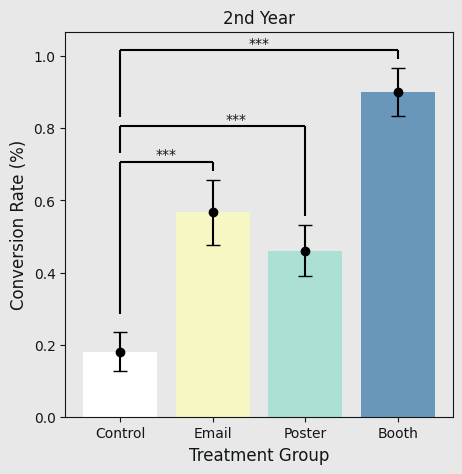

In [288]:
def proportion_sample_error(p, n):
    return np.sqrt(p * (1 - p) / n)

def significance(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    
# PLOT FOR 1st YEAR

plt.figure(figsize=(5, 5))

email_treatment = email_treatment_year2
poster_treatment = poster_treatment_year2
booth_treatment = booth_treatment_year2

sns.barplot(x=["Control", "Email", "Poster", "Booth"],
            y=[control.mean(), email_treatment.mean(), poster_treatment.mean(), booth_treatment.mean()],
            palette=colors, ci=None)

# Error Bars

plt.errorbar(0, control.mean(), yerr=proportion_sample_error(control.mean(), control.shape[0]),
                 fmt='o', color='black', capsize=5)
plt.errorbar(1, email_treatment.mean(), yerr=proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(2, poster_treatment.mean(), yerr=proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(3, booth_treatment.mean(), yerr=proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)  

# Significance Resutls

control_height = control.mean() + proportion_sample_error(control.mean(), control.shape[0])

## Control vs Email
email_height = email_treatment.mean() + proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]) + .05
plt.hlines(email_height, 0, 1, color='black', linestyle='-')
control_star = significance(pval_1)
plt.text(0.5, email_height, control_star, ha='center', va='bottom')

## Control vs Poster
poster_height = poster_treatment.mean() + proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]) + .05  + .225
plt.hlines(poster_height, 0, 2, color='black', linestyle='-')
poster_star = significance(pval_2)
plt.text(1.25, poster_height, poster_star, ha='center', va='bottom')

## Control vs Booth
booth_height = booth_treatment.mean() + proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]) + .05
plt.hlines(booth_height, 0, 3, color='black', linestyle='-')
booth_star = significance(pval_3)
plt.text(1.5, booth_height, booth_star, ha='center', va='bottom')

## VLINEs 
plt.vlines(0, control_height + .05, email_height, color='black', linestyle='-')
plt.vlines(0, email_height + .025, poster_height, color='black', linestyle='-')
plt.vlines(0, poster_height + .025, booth_height, color='black', linestyle='-')

plt.vlines(1, email_height - .025, email_height, color='black', linestyle='-')
plt.vlines(2, poster_height - .25, poster_height, color='black', linestyle='-')
plt.vlines(3, booth_height - .025, booth_height, color='black', linestyle='-')

# General Labels

plt.xlabel("Treatment Group", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("2nd Year")


C:\Users\commo\AppData\Local\Temp\ipykernel_15312\2673519634.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=["Control", "Email", "Poster", "Booth"],


Text(0.5, 1.0, '3rd Year')

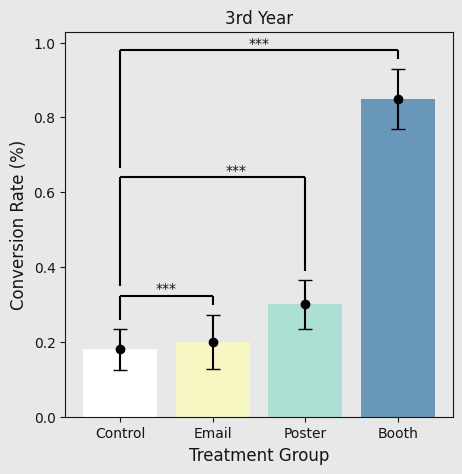

In [289]:
def proportion_sample_error(p, n):
    return np.sqrt(p * (1 - p) / n)

def significance(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    
# PLOT FOR 2nd YEARs

plt.figure(figsize=(5, 5))


email_treatment = email_treatment_year3
poster_treatment = poster_treatment_year3
booth_treatment = booth_treatment_year3

sns.barplot(x=["Control", "Email", "Poster", "Booth"],
            y=[control.mean(), email_treatment.mean(), poster_treatment.mean(), booth_treatment.mean()],
            palette=colors, ci=None)

# Error Bars

plt.errorbar(0, control.mean(), yerr=proportion_sample_error(control.mean(), control.shape[0]),
                 fmt='o', color='black', capsize=5)
plt.errorbar(1, email_treatment.mean(), yerr=proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(2, poster_treatment.mean(), yerr=proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(3, booth_treatment.mean(), yerr=proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)  

# Significance Resutls

control_height = control.mean() + proportion_sample_error(control.mean(), control.shape[0])

## Control vs Email
email_height = email_treatment.mean() + proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]) + .05
plt.hlines(email_height, 0, 1, color='black', linestyle='-')
control_star = significance(pval_1)
plt.text(0.5, email_height, control_star, ha='center', va='bottom')

## Control vs Poster
poster_height = poster_treatment.mean() + proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]) + .05  + .225
plt.hlines(poster_height, 0, 2, color='black', linestyle='-')
poster_star = significance(pval_2)
plt.text(1.25, poster_height, poster_star, ha='center', va='bottom')

## Control vs Booth
booth_height = booth_treatment.mean() + proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]) + .05
plt.hlines(booth_height, 0, 3, color='black', linestyle='-')
booth_star = significance(pval_3)
plt.text(1.5, booth_height, booth_star, ha='center', va='bottom')

## VLINEs 
plt.vlines(0, control_height + .025, email_height, color='black', linestyle='-')
plt.vlines(0, email_height + .025, poster_height, color='black', linestyle='-')
plt.vlines(0, poster_height + .025, booth_height, color='black', linestyle='-')

plt.vlines(1, email_height - .025, email_height, color='black', linestyle='-')
plt.vlines(2, poster_height - .25, poster_height, color='black', linestyle='-')
plt.vlines(3, booth_height - .025, booth_height, color='black', linestyle='-')

# General Labels

plt.xlabel("Treatment Group", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("3rd Year")


C:\Users\commo\AppData\Local\Temp\ipykernel_15312\3438527967.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=["Control", "Email", "Poster", "Booth"],


Text(0.5, 1.0, '4th Year')

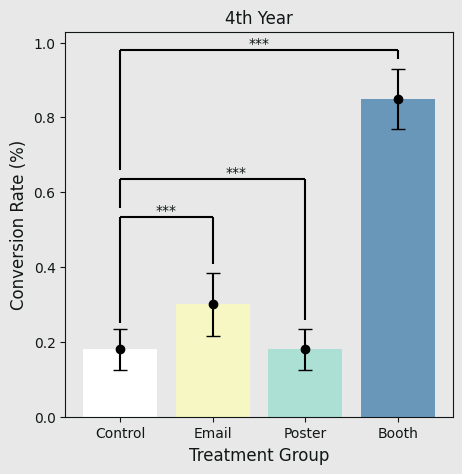

In [297]:
def proportion_sample_error(p, n):
    return np.sqrt(p * (1 - p) / n)

def significance(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    
# PLOT FOR 4th YEAR

plt.figure(figsize=(5, 5))

email_treatment = email_treatment_year4
poster_treatment = poster_treatment_year4
booth_treatment = booth_treatment_year4

sns.barplot(x=["Control", "Email", "Poster", "Booth"],
            y=[control.mean(), email_treatment.mean(), poster_treatment.mean(), booth_treatment.mean()],
            palette=colors, ci=None)

# Error Bars

plt.errorbar(0, control.mean(), yerr=proportion_sample_error(control.mean(), control.shape[0]),
                 fmt='o', color='black', capsize=5)
plt.errorbar(1, email_treatment.mean(), yerr=proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(2, poster_treatment.mean(), yerr=proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)
plt.errorbar(3, booth_treatment.mean(), yerr=proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]),
                    fmt='o', color='black', capsize=5)  

# Significance Resutls

control_height = control.mean() + proportion_sample_error(control.mean(), control.shape[0])

## Control vs Email
email_height = email_treatment.mean() + proportion_sample_error(email_treatment.mean(), email_treatment.shape[0]) + .05 + .1
plt.hlines(email_height, 0, 1, color='black', linestyle='-')
control_star = significance(pval_1)
plt.text(0.5, email_height, control_star, ha='center', va='bottom')

## Control vs Poster
poster_height = poster_treatment.mean() + proportion_sample_error(poster_treatment.mean(), poster_treatment.shape[0]) + .05  + .35
plt.hlines(poster_height, 0, 2, color='black', linestyle='-')
poster_star = significance(pval_2)
plt.text(1.25, poster_height, poster_star, ha='center', va='bottom')

## Control vs Booth
booth_height = booth_treatment.mean() + proportion_sample_error(booth_treatment.mean(), booth_treatment.shape[0]) + .05
plt.hlines(booth_height, 0, 3, color='black', linestyle='-')
booth_star = significance(pval_3)
plt.text(1.5, booth_height, booth_star, ha='center', va='bottom')

## VLINEs 
plt.vlines(0, control_height + .015, email_height, color='black', linestyle='-')
plt.vlines(0, email_height + .025, poster_height, color='black', linestyle='-')
plt.vlines(0, poster_height + .025, booth_height, color='black', linestyle='-')

plt.vlines(1, email_height - .125, email_height, color='black', linestyle='-')
plt.vlines(2, poster_height - .375, poster_height, color='black', linestyle='-')
plt.vlines(3, booth_height - .025, booth_height, color='black', linestyle='-')

# General Labels

plt.xlabel("Treatment Group", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.title("4th Year")
